#Trabajo Práctico 2
##Actividades:

1- Familiarizarse con los modelos, híper-parámetros y bloques constructivos (actividad reflexiva, no es necesario elaborar informe sobre ellos para la entrega del TP).

2- Evaluar el uso de regularización. Evaluar el uso de función de costo L1. Hacer una búsqueda en grilla de los híper-parámetros (learning_rate, weight_decay, epochs).

3- Implementar y entrenar un modelo de red feedforward de dos capas como la segunda de la figura. Experimentar con distintos números de nodos en la capa oculta. Repetir la búsqueda de tasa de aprendizaje (learning rate) del punto anterior.

4- Con esta red neuronal, experimentar distintas funciones de activación, como la tangente hiperbólica (Tanh) o ReLU (buscar las mismas, por ejemplo, en la documentación de Pytorch).

5- Evaluar cómo cambia la convergencia de esta red neuronal con distintos valores de batch size y learning rate.

6- A partir de la versión con mini-batches, modificar el bucle de entrenamiento para que, sin modificar la iteración sobre el DataLoader, implemente descenso de gradiente estándar (vanilla) (actualización utilizando el gradiente sobre la función de costo acumulada, tras recorrer todo el dataset).

7- (Opcional) Buscar mejorar lo más posible la tasa de aciertos para todas las clases del CIFAR-10 (ver notebook siguiente). Ej: data augmentation, distintos híper-parámetros, distinta arquitectura, distinto optimizador, o con lo que se te ocurra.

8- (Opcional) Usar una red preentrenada y completar alguna(s) de las consignas de transfer learning para el dominio de ejemplo (clasificar hormigas y abejas), o bien para algún dominio de imágenes de tu interés (ver detalle de actividades opcionales en notebook siguiente).

In [ ]:
#Como paso principal, descarg el archivo funciones_utiles.py desde GitHub para poder utilizarlo.
!wget https://raw.githubusercontent.com/inteligenciafrvm/inteligenciafrvm/master/Clases%20pr%C3%A1cticas/funciones_utiles.py

--2021-06-09 01:41:41--  https://raw.githubusercontent.com/inteligenciafrvm/inteligenciafrvm/master/Clases%20pr%C3%A1cticas/funciones_utiles.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4786 (4.7K) [text/plain]
Saving to: ‘funciones_utiles.py’

funciones_utiles.py 100%[===================>]   4.67K  --.-KB/s    in 0s      

2021-06-09 01:41:41 (60.9 MB/s) - ‘funciones_utiles.py’ saved [4786/4786]



In [ ]:
#Importo las librerias de PyTorch para poder trabajar luego
import numpy as np
import torch
from torch import nn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
from torch.optim import SGD
from funciones_utiles import create_sinusoidal_data as create_data
from funciones_utiles import polynomial_features
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils import data
warnings.simplefilter('ignore')

np.random.seed(20)

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
    
print(device)
#El resultado fue Cuda 0, asi que esta bien activada la configuracion de CUDA en Colab.

cuda:0


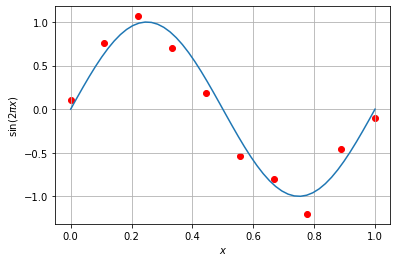

In [ ]:



x_train, y_train, x_val, y_val = create_data()

plt.plot(x_val, y_val)
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()

In [ ]:


P = 3

x_train_vec = polynomial_features(x_train, P)
y_train_vec = y_train.reshape(-1, 1) # aumentamos nuestro tensor de 1D a 2D pues así lo usará nuestro modelo

x_val_vec = polynomial_features(x_val, P)
y_val_vec = y_val.reshape(-1, 1)

print(x_train_vec.shape, x_val_vec.shape)

(10, 3) (50, 3)


Lo realizado hasta aqui, no es nada mas que la ambientacion con el notebook que se encuentra en el repo.
Traje la estructura inicial como siempre para poder trabajar con todo el notebook


Inicializo el modelo para poder trabajar con redes neuronales en base al dataset de juguete que cree anteriormente para poder visualizar como se comporta en base a los diferentes parametros, antes y despues de la busqueda en grilla

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, num_features):
        super().__init__()        
        self.fc = nn.Linear(in_features=num_features, out_features=1, bias=True)
        
    def forward(self, x):
        out = self.fc(x)
        return out


In [ ]:
#Instanciamos nuestro modelo de regresion lineal creado anteriormente
model = LinearRegression(num_features=P)

In [ ]:
model.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
#Realizo


model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.0  # L2 regularization coef.

criterion = nn.MSELoss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [ ]:
# model.eval() pone el modelo en "evaluación", desactivando particularidades de entrenamiento
# estas se reactivan cuando hacemos model.train()
model.eval()

# aquí impedimos se procesen gradientes ya que estamos evaluando
with torch.no_grad():
    inputs_all = torch.from_numpy(np.float32(x_train_vec)).to(device)
    
    input_single = inputs_all[1]
    output_single = model(inputs_all[1])
    output_all = model(inputs_all)
    print('Ejemplo de 1 vector de entrada: {}'.format(input_single))
    print('Salida para ese vector: {}'.format(output_single))
    print('Salida para cada entrada:\n {}'.format(output_all))

Ejemplo de 1 vector de entrada: tensor([0.1111, 0.0123, 0.0014], device='cuda:0')
Salida para ese vector: tensor([-0.1837], device='cuda:0')
Salida para cada entrada:
 tensor([[-0.5142],
        [-0.1837],
        [-0.6168],
        [-0.3627],
        [-0.1460],
        [-0.2210],
        [-0.4306],
        [-0.7414],
        [-0.3073],
        [-0.2612]], device='cuda:0')


In [ ]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.0  # L2 regularization coef.

criterion = nn.MSELoss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [ ]:
#Entrenamiento del modelo
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 4.838e-01, val_loss = 4.415e-01
epoch = 1000, train_loss = 2.307e-01, val_loss = 2.057e-01
epoch = 2000, train_loss = 2.164e-01, val_loss = 1.956e-01
epoch = 3000, train_loss = 2.043e-01, val_loss = 1.856e-01
epoch = 4000, train_loss = 1.930e-01, val_loss = 1.760e-01
epoch = 5000, train_loss = 1.825e-01, val_loss = 1.670e-01
epoch = 6000, train_loss = 1.725e-01, val_loss = 1.584e-01
epoch = 7000, train_loss = 1.632e-01, val_loss = 1.504e-01
epoch = 8000, train_loss = 1.545e-01, val_loss = 1.429e-01
epoch = 9000, train_loss = 1.462e-01, val_loss = 1.357e-01


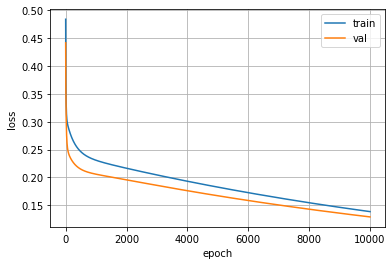

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

Teniendo ya la estructura del notebook que esta en github, puedo comenzar a realizar el practico.
Lo traje tal cual para poder practicar y entrar en contexto con el practico

In [ ]:
l1_loss = nn.SmoothL1Loss() #####Hago uso de la libreria que provee pytorch para poder realizar

In [ ]:
model_wd = LinearRegression(num_features=P)
model_wd.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_wd.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
model_wd.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
#Vuelvo a traer el bloque de entrenamiendo para poder pisar los datos y probar con la regularizacion L2 - weight decay
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = model_wd(x_train_tensor)                       
    loss = criterion(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_wd(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 5.524e-01, val_loss = 5.145e-01
epoch = 1000, train_loss = 2.256e-01, val_loss = 2.009e-01
epoch = 2000, train_loss = 2.111e-01, val_loss = 1.910e-01
epoch = 3000, train_loss = 1.994e-01, val_loss = 1.814e-01
epoch = 4000, train_loss = 1.884e-01, val_loss = 1.721e-01
epoch = 5000, train_loss = 1.781e-01, val_loss = 1.633e-01
epoch = 6000, train_loss = 1.685e-01, val_loss = 1.550e-01
epoch = 7000, train_loss = 1.594e-01, val_loss = 1.471e-01
epoch = 8000, train_loss = 1.509e-01, val_loss = 1.398e-01
epoch = 9000, train_loss = 1.429e-01, val_loss = 1.328e-01


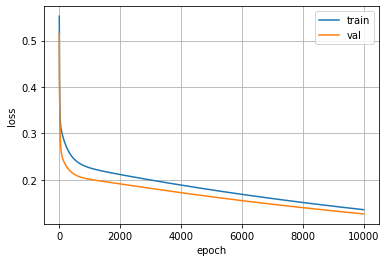

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()


In [ ]:
#Prueba de los mismo pero con la funcion de costo L1
model_wdL1 = LinearRegression(num_features=P)
model_wdL1.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

#criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_wdL1.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
model_wdL1.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = model_wdL1(x_train_tensor)                       
    loss = l1_loss(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_wdL1(x_val_tensor)
        loss = l1_loss(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 1.776e-02, val_loss = 3.493e-03
epoch = 1000, train_loss = 1.365e-02, val_loss = 2.371e-03
epoch = 2000, train_loss = 1.325e-02, val_loss = 2.262e-03
epoch = 3000, train_loss = 1.295e-02, val_loss = 2.216e-03
epoch = 4000, train_loss = 1.270e-02, val_loss = 2.183e-03
epoch = 5000, train_loss = 1.249e-02, val_loss = 2.156e-03
epoch = 6000, train_loss = 1.230e-02, val_loss = 2.133e-03
epoch = 7000, train_loss = 1.215e-02, val_loss = 2.114e-03
epoch = 8000, train_loss = 1.201e-02, val_loss = 2.098e-03
epoch = 9000, train_loss = 1.189e-02, val_loss = 2.084e-03


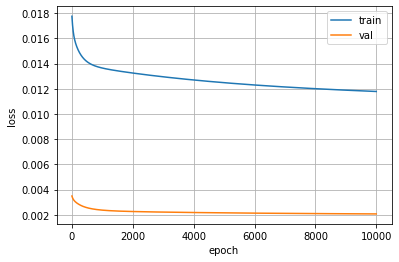

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()


Como veo que la curva de loss cambio con respecto a la anterior, voy a cambiar otro valor de wd para ver como se comporta


In [ ]:
#Instancio nuevamente el modelo, para crear uno nuevo y me queden todos modelos separados para trabajar
model_wd2 = LinearRegression(num_features=P)
model_wd2.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_wd2.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
model_wd2.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:


WEIGHT_DECAY = 0.0001 #dos ceros menos respecto al anterior
optimizer = SGD(model_wd2.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = model_wd2(x_train_tensor)                       
    loss = criterion(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_wd2(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 3.130e-01, val_loss = 2.734e-01
epoch = 1000, train_loss = 2.237e-01, val_loss = 2.000e-01
epoch = 2000, train_loss = 2.103e-01, val_loss = 1.904e-01
epoch = 3000, train_loss = 1.990e-01, val_loss = 1.810e-01
epoch = 4000, train_loss = 1.884e-01, val_loss = 1.720e-01
epoch = 5000, train_loss = 1.786e-01, val_loss = 1.636e-01
epoch = 6000, train_loss = 1.695e-01, val_loss = 1.557e-01
epoch = 7000, train_loss = 1.610e-01, val_loss = 1.484e-01
epoch = 8000, train_loss = 1.531e-01, val_loss = 1.416e-01
epoch = 9000, train_loss = 1.457e-01, val_loss = 1.351e-01


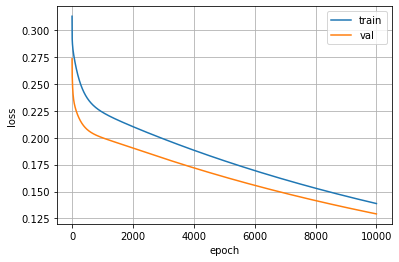

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

Bueno, hasta aca, veo que valores mas cercanos a cero, la curva busca a plancharse, cambiando la regularizacion.
Vuelvo a crear otro modelo al igual que antes para poder trabajar en cada prueba


In [ ]:
model_wd3 = LinearRegression(num_features=P)
model_wd3.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_wd3.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
model_wd3.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
#Cambios en el lr para ver como se comporta con respecto a la ultima curva
WEIGHT_DECAY = 0.0001 
LEARNING_RATE = 0.01 #lr mas chico que el anterior
optimizer = SGD(model_wd3.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = model_wd3(x_train_tensor)                       
    loss = criterion(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_wd3(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 4.331e-01, val_loss = 4.330e-01
epoch = 1000, train_loss = 2.701e-01, val_loss = 2.286e-01
epoch = 2000, train_loss = 2.560e-01, val_loss = 2.182e-01
epoch = 3000, train_loss = 2.460e-01, val_loss = 2.118e-01
epoch = 4000, train_loss = 2.387e-01, val_loss = 2.073e-01
epoch = 5000, train_loss = 2.333e-01, val_loss = 2.041e-01
epoch = 6000, train_loss = 2.292e-01, val_loss = 2.017e-01
epoch = 7000, train_loss = 2.260e-01, val_loss = 1.999e-01
epoch = 8000, train_loss = 2.234e-01, val_loss = 1.985e-01
epoch = 9000, train_loss = 2.213e-01, val_loss = 1.972e-01


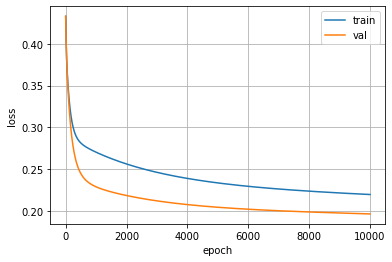

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

Despues de ver el ultimo grafico, creo que serian necesarias mas epocas para que pudiera mejorar el mismo, voy a probar con eso y ver como mejora

In [ ]:
model_ep = LinearRegression(num_features=P)
model_ep.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_ep.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
model_ep.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
EPOCHS = 100000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = model_ep(x_train_tensor)                       
    loss = criterion(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_ep(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 5.187e-01, val_loss = 4.386e-01
epoch = 10000, train_loss = 1.366e-01, val_loss = 1.273e-01
epoch = 20000, train_loss = 8.232e-02, val_loss = 7.912e-02
epoch = 30000, train_loss = 5.355e-02, val_loss = 5.234e-02
epoch = 40000, train_loss = 3.829e-02, val_loss = 3.726e-02
epoch = 50000, train_loss = 3.018e-02, val_loss = 2.860e-02
epoch = 60000, train_loss = 2.587e-02, val_loss = 2.353e-02
epoch = 70000, train_loss = 2.357e-02, val_loss = 2.050e-02
epoch = 80000, train_loss = 2.235e-02, val_loss = 1.863e-02
epoch = 90000, train_loss = 2.169e-02, val_loss = 1.746e-02


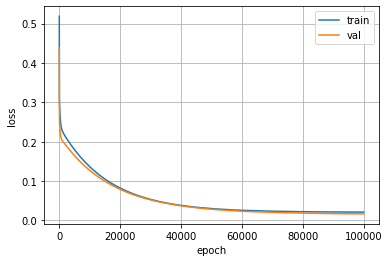

In [ ]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()  
y_pred = model(x_val_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

Efectivamente, la curva tuvo un cambio con respecto a la anterior, pero no mejora agregando mas epocas como lo imagine.
Las pruebas estan siendo realizadas en un cuaderno Colab con GPU compartida.
Realizare una busqueda en grilla (con un metodo a mano) para encontrar cuales son los hiper parametros mas optimos, ahora que ya conozco como funciona la curva.

epoch = 00, train_loss = 5.897e-01, val_loss = 4.265e-01
epoch = 1000, train_loss = 2.222e-01, val_loss = 1.983e-01
epoch = 2000, train_loss = 2.083e-01, val_loss = 1.887e-01
epoch = 3000, train_loss = 1.968e-01, val_loss = 1.792e-01
epoch = 4000, train_loss = 1.860e-01, val_loss = 1.700e-01
epoch = 5000, train_loss = 1.758e-01, val_loss = 1.613e-01
epoch = 6000, train_loss = 1.663e-01, val_loss = 1.531e-01
epoch = 7000, train_loss = 1.574e-01, val_loss = 1.454e-01
epoch = 8000, train_loss = 1.490e-01, val_loss = 1.381e-01
epoch = 9000, train_loss = 1.411e-01, val_loss = 1.313e-01
epoch = 00, train_loss = 4.519e-01, val_loss = 4.456e-01
epoch = 1000, train_loss = 2.343e-01, val_loss = 2.087e-01
epoch = 2000, train_loss = 2.197e-01, val_loss = 1.984e-01
epoch = 3000, train_loss = 2.074e-01, val_loss = 1.883e-01
epoch = 4000, train_loss = 1.960e-01, val_loss = 1.785e-01
epoch = 5000, train_loss = 1.852e-01, val_loss = 1.693e-01
epoch = 6000, train_loss = 1.751e-01, val_loss = 1.607e-01
e

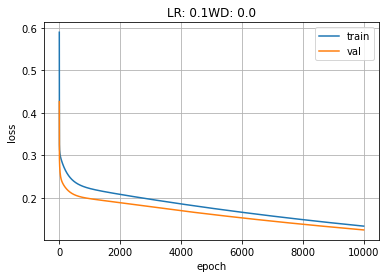

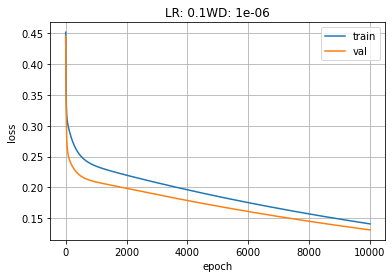

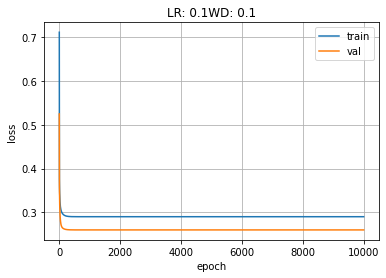

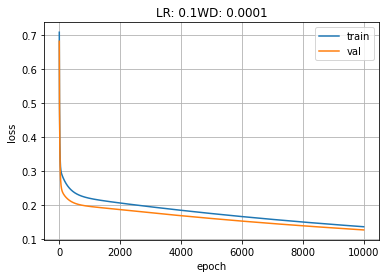

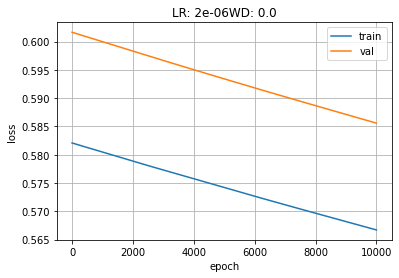

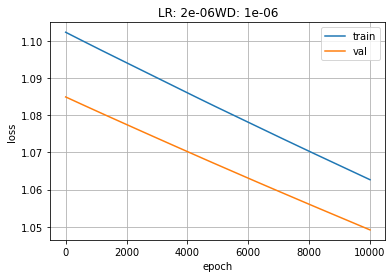

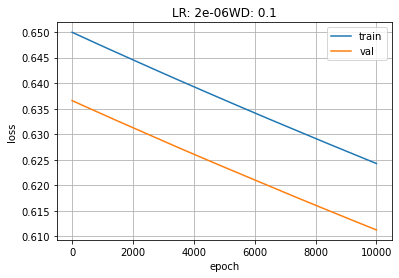

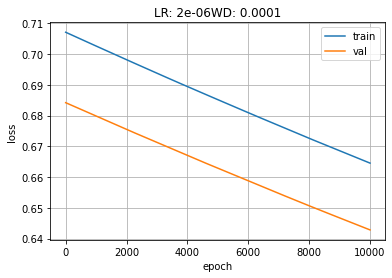

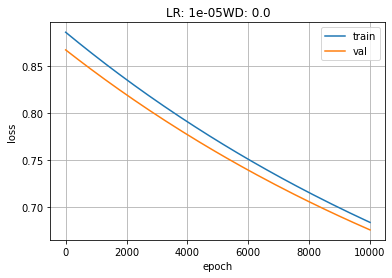

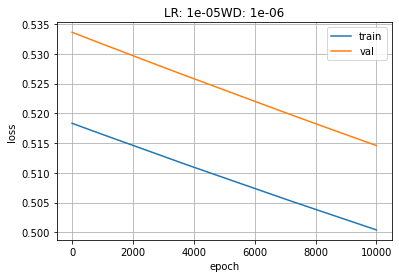

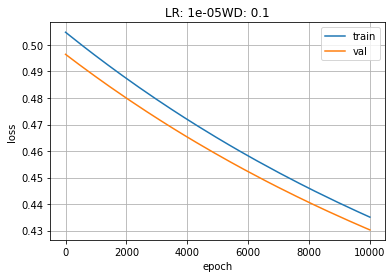

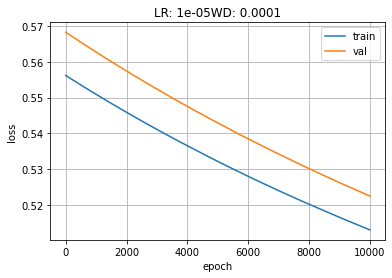

In [ ]:
model_beg = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000]
WEIGHT_DECAY = [0.0, 0.000001,0.1,0.0001] # L2 regularization coef.

criterion = nn.MSELoss(reduction='sum')

for lr in range(len(LEARNING_RATE)):
  for wd in  range(len(WEIGHT_DECAY)):
    del (model_beg)
    model_beg =LinearRegression(num_features=P)
  

    optimizer = SGD(model_beg.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
    model_beg.to(device)
    model_beg.train()
    
    for e in range(len(EPOCHS)):
      
      
      title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd])
      x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
      y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
      n_train = len(x_train_tensor)

      x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
      y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
      n_val = len(x_val_tensor)

      train_loss = []
      val_loss = []
    
      for epoch in range(EPOCHS[e]):

        optimizer.zero_grad()                                
        y_pred = model_beg(x_train_tensor)                       
        loss = criterion(y_pred, y_train_tensor) / n_train   
        loss.backward()                                      
        optimizer.step()                                     
        
        train_loss.append(loss.detach().item())
        
        with torch.no_grad():
          y_pred = model_beg(x_val_tensor)
          loss = criterion(y_pred, y_val_tensor) / n_val
          val_loss.append(loss.item())
                    
        if epoch % (EPOCHS[e]//10) == 0:
          print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
              
      plt.figure()
      plt.plot(np.arange(EPOCHS[e]), train_loss)
      plt.plot(np.arange(EPOCHS[e]), val_loss)
      plt.title(title)
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'])
      plt.grid()
      train_loss =0
      val_loss = 0
      model.eval()  
      y_pred = model_beg(x_val_tensor)
      y_pred = y_pred.cpu().detach().numpy().squeeze()  

Lo que realizo en la celda anterior, es hacer una busqueda en grilla a mano, probando cada uno de los learning rate y weight decay para poder conocer cual option es mejor para la solucion que estoy realizando.
A simple vista, parece que los valores optimos son lr=0.1 y wd=0.1, pero se puede observar un pequeño overfiting a la hora de analizar profundamenta.
Luego, podemos analizar que como por ejemplo la grafica de lr=0.1 y wd=0.0001, converga de manera correcta pero se nota un leve overrfiting, Aunque, quedando dentro de las mejores. Luego una tercera opcion es la primera iteracion, que se realiza una convergencia optima y se puede observar que posiblemente, aumentando las epocas, se obtiene una mejora en la convergencia del modelo.
Luego, las demas graficas, no convergen o hay mucha discrepancia entre train y test.


Para no realizar cada una de las pruebas anteriores con L1 Loss, las hago aca donde hago las pruebas con cada valor.

epoch = 00, train_loss = 2.066e-02, val_loss = 3.863e-03
epoch = 1000, train_loss = 1.539e-02, val_loss = 2.600e-03
epoch = 2000, train_loss = 1.471e-02, val_loss = 2.458e-03
epoch = 3000, train_loss = 1.418e-02, val_loss = 2.378e-03
epoch = 4000, train_loss = 1.373e-02, val_loss = 2.317e-03
epoch = 5000, train_loss = 1.336e-02, val_loss = 2.268e-03
epoch = 6000, train_loss = 1.305e-02, val_loss = 2.227e-03
epoch = 7000, train_loss = 1.279e-02, val_loss = 2.193e-03
epoch = 8000, train_loss = 1.256e-02, val_loss = 2.165e-03
epoch = 9000, train_loss = 1.238e-02, val_loss = 2.142e-03
epoch = 00, train_loss = 2.189e-02, val_loss = 4.386e-03
epoch = 1000, train_loss = 2.188e-02, val_loss = 4.386e-03
epoch = 2000, train_loss = 2.188e-02, val_loss = 4.385e-03
epoch = 3000, train_loss = 2.188e-02, val_loss = 4.385e-03
epoch = 4000, train_loss = 2.188e-02, val_loss = 4.384e-03
epoch = 5000, train_loss = 2.188e-02, val_loss = 4.384e-03
epoch = 6000, train_loss = 2.187e-02, val_loss = 4.383e-03
e

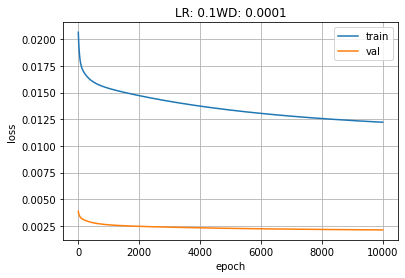

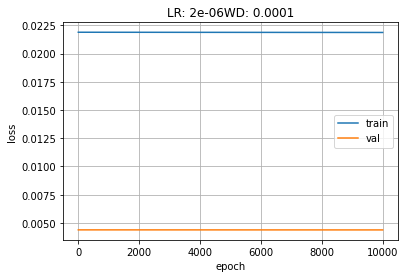

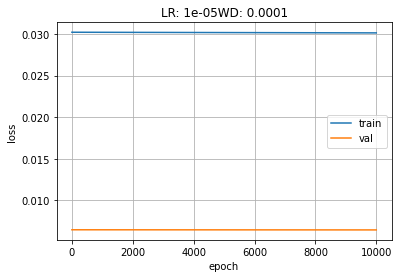

In [ ]:
model_beg_l1 = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000]


##criterion = nn.MSELoss(reduction='sum')

for lr in range(len(LEARNING_RATE)):
  
  del (model_beg_l1)
  model_beg_l1 =LinearRegression(num_features=P)


  optimizer = SGD(model_beg_l1.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
  model_beg_l1.to(device)
  model_beg_l1.train()
  
  for e in range(len(EPOCHS)):
    
    title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd])
    x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
    y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
    n_train = len(x_train_tensor)

    x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
    y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
    n_val = len(x_val_tensor)

    train_loss = []
    val_loss = []
  
    for epoch in range(EPOCHS[e]):

      optimizer.zero_grad()                                
      y_pred = model_beg_l1(x_train_tensor)                       
      loss = l1_loss(y_pred, y_train_tensor) / n_train   
      loss.backward()                                      
      optimizer.step()                                     
      
      train_loss.append(loss.detach().item())
      
      with torch.no_grad():
        y_pred = model_beg_l1(x_val_tensor)
        loss =l1_loss(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                  
      if epoch % (EPOCHS[e]//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
            
    plt.figure()
    plt.plot(np.arange(EPOCHS[e]), train_loss)
    plt.plot(np.arange(EPOCHS[e]), val_loss)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()
    train_loss =0
    val_loss = 0
    model.eval()  
    y_pred = model_beg_l1(x_val_tensor)
    y_pred = y_pred.cpu().detach().numpy().squeeze()  

Lo que se realizo anteriormente es probar la diferencia a grandes rasgos de la diferencia de utilizar L1 o L2, efectivamente, se nota en base a la acotacion de los diferentes lr elegidos para no hacer muy pesado computacionalmente el notebook, se observa que utilizar L1 no es la mejor opcion.


A continuacion, realizare la implementacion de la red FeedFordward con una capa oculta


In [ ]:
#Para poder guiarme mejor, recurri a un ejemplo que habia realizado en anterioridad para otra materia, donde aqui le retoque
#algunos valores para poder mejorar su funcionamiento y sea acorde al practico
#Modelo de FF con activacion ReLU
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()        
        # completa con tu código aquí
        self.num_features = num_features
        self.num_hidden = num_hidden
        self.fc1 = torch.nn.Linear(self.num_features, self.num_hidden) #Capa de entrada, features
        self.relu = torch.nn.ReLU() #Capa oculta
        self.output = nn.Linear(num_hidden, 1) #Capa de salida 
        
    def forward(self, x):

        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.output(relu)
        
        return output

In [ ]:
#Instancia de la red ff creada con 20 neuronas oculta.
modelFF = FeedforwardNet(num_features=P, num_hidden = 20) 

In [ ]:
print(modelFF) #Verifico para ver que tiene el modelo

FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=20, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
modelFF.to(device)

FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=20, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=20, out_features=1, bias=True)
)

In [ ]:
modelff = FeedforwardNet(num_features=P,num_hidden=1)
modelff.train()  # modelo nuevamente activado para entrenamiento, por las dudas que antes lo use con evaluacion

LEARNING_RATE = 0.1 # lr lo mantengo igual
WEIGHT_DECAY = 0.000001  # Pruebo con un valor mas chico de wd para ver como funciona.

criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model_ep.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
modelff.to(device)

FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#Realizo una pequeña prueba para ver que el modelo funciona
EPOCHS = 10000
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
n_val = len(x_val_tensor)

train_loss = []
val_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                
    y_pred = modelff(x_train_tensor)                       
    loss = criterion(y_pred, y_train_tensor) / n_train   
    loss.backward()                                      
    optimizer.step()                                     
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model_ep(x_val_tensor)
        loss = criterion(y_pred, y_val_tensor) / n_val
        val_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))

epoch = 00, train_loss = 5.181e-01, val_loss = 1.670e-02
epoch = 1000, train_loss = 5.181e-01, val_loss = 1.674e-02
epoch = 2000, train_loss = 5.181e-01, val_loss = 1.679e-02
epoch = 3000, train_loss = 5.181e-01, val_loss = 1.683e-02
epoch = 4000, train_loss = 5.181e-01, val_loss = 1.688e-02
epoch = 5000, train_loss = 5.181e-01, val_loss = 1.692e-02
epoch = 6000, train_loss = 5.181e-01, val_loss = 1.697e-02
epoch = 7000, train_loss = 5.181e-01, val_loss = 1.701e-02
epoch = 8000, train_loss = 5.181e-01, val_loss = 1.706e-02
epoch = 9000, train_loss = 5.181e-01, val_loss = 1.711e-02


Hasta aqui se que el modelo funciona, ahora voy a evaluar con diferentes LR y WD para poder ver si cambia a diferencia de los anteriores.


epoch = 00, train_loss = 6.701e-01, val_loss = 6.360e-01
epoch = 1000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 2000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 3000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 4000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 5000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 6000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 7000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 8000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 9000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 00, train_loss = 9.901e-01, val_loss = 7.701e-01
epoch = 1000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 2000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 3000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 4000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 5000, train_loss = 4.820e-01, val_loss = 4.909e-01
epoch = 6000, train_loss = 4.820e-01, val_loss = 4.909e-01
e

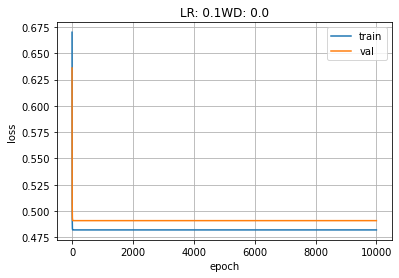

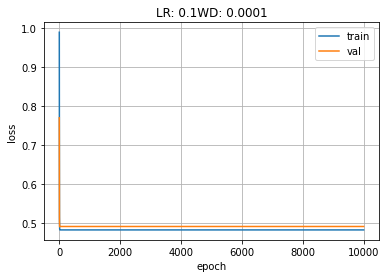

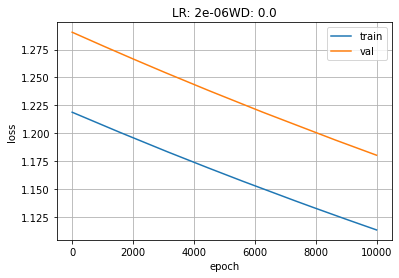

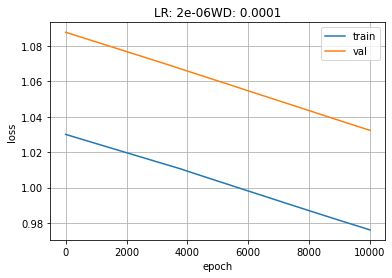

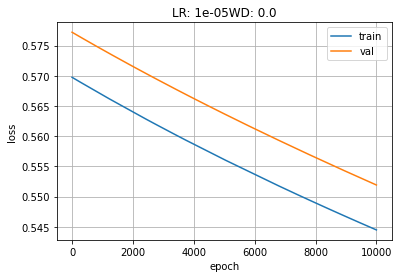

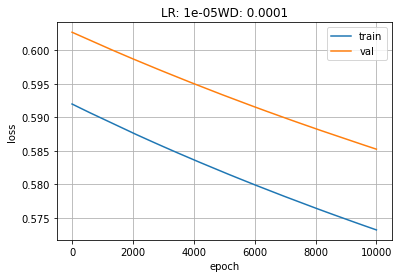

In [ ]:
modelff_gs = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000]
WEIGHT_DECAY = [0.00000,0.0001] 

criterion = nn.MSELoss(reduction='sum')

for lr in range(len(LEARNING_RATE)):
  for wd in  range(len(WEIGHT_DECAY)):
    del (modelff_gs)
    modelff_gs =FeedforwardNet(num_features=P,num_hidden=1) ##Modelo de feed forward con busqueda en grilla casera
  

    optimizer = SGD(modelff_gs.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
    modelff_gs.to(device)
    modelff_gs.train()
    
    for e in range(len(EPOCHS)):
      
      
      title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd])
      x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
      y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
      n_train = len(x_train_tensor)

      x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
      y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
      n_val = len(x_val_tensor)

      train_loss = []
      val_loss = []
    
      for epoch in range(EPOCHS[e]):

        optimizer.zero_grad()                                
        y_pred = modelff_gs(x_train_tensor)                       
        loss = criterion(y_pred, y_train_tensor) / n_train   
        loss.backward()                                      
        optimizer.step()                                     
        
        train_loss.append(loss.detach().item())
        
        with torch.no_grad():
          y_pred = modelff_gs(x_val_tensor)
          loss = criterion(y_pred, y_val_tensor) / n_val
          val_loss.append(loss.item())
                    
        if epoch % (EPOCHS[e]//10) == 0:
          print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
              
      plt.figure()
      plt.plot(np.arange(EPOCHS[e]), train_loss)
      plt.plot(np.arange(EPOCHS[e]), val_loss)
      plt.title(title)
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'])
      plt.grid()
      train_loss =0
      val_loss = 0
      model.eval()  
      y_pred = modelff_gs(x_val_tensor)
      y_pred = y_pred.cpu().detach().numpy().squeeze() 

In [ ]:
#Modelo de FF con dos capas ocultas con activacion ReLU
class FeedforwardNet2Layer(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()        
        # completa con tu código aquí
        self.num_features = num_features
        self.num_hidden = num_hidden
        self.input = torch.nn.Linear(self.num_features, self.num_hidden)
        self.hidden1= torch.nn.ReLU()
        self.hidden2= torch.nn.ReLU()
        self.output = nn.Linear(num_hidden, 1)
        
    def forward(self, x):

        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        return self.output(x)
        

Hago las mismas pruebas pero esta vez, aumentando a mas neuronas ocultas. Luego, realizar, aumentando la cantidad de capas hasta 3.



epoch = 00, train_loss = 4.258e-01, val_loss = 3.818e-01
epoch = 1000, train_loss = 3.047e-02, val_loss = 1.526e-02
epoch = 2000, train_loss = 1.351e-02, val_loss = 8.661e-03
epoch = 3000, train_loss = 8.901e-03, val_loss = 1.017e-02
epoch = 4000, train_loss = 7.150e-03, val_loss = 1.164e-02
epoch = 5000, train_loss = 4.984e-03, val_loss = 1.261e-02
epoch = 6000, train_loss = 3.800e-03, val_loss = 1.279e-02
epoch = 7000, train_loss = 3.097e-03, val_loss = 1.331e-02
epoch = 8000, train_loss = 2.602e-03, val_loss = 1.344e-02
epoch = 9000, train_loss = 1.908e-03, val_loss = 1.359e-02
epoch = 00, train_loss = 4.785e-01, val_loss = 4.405e-01
epoch = 1000, train_loss = 2.414e-01, val_loss = 2.156e-01
epoch = 2000, train_loss = 2.402e-01, val_loss = 2.144e-01
epoch = 3000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 4000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 5000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 6000, train_loss = 2.401e-01, val_loss = 2.144e-01
e

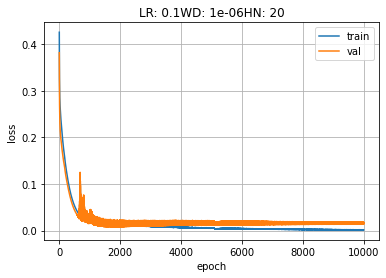

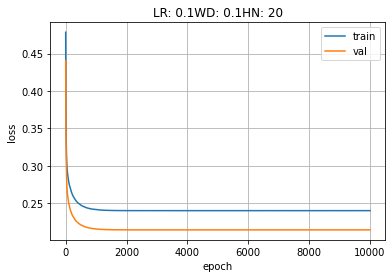

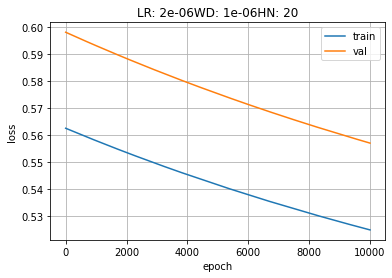

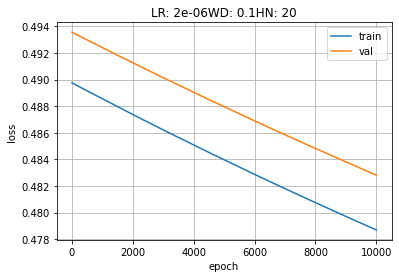

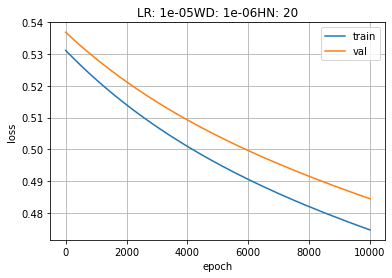

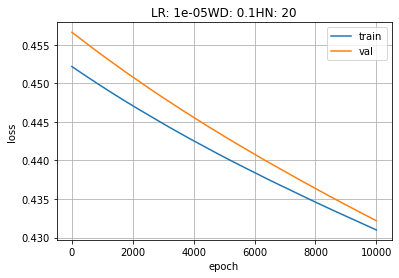

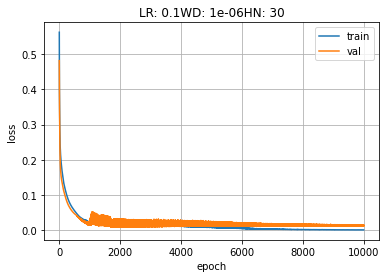

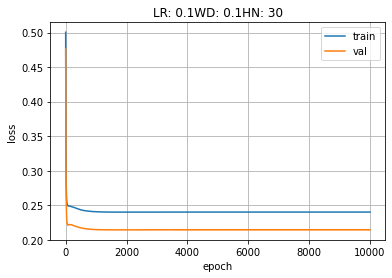

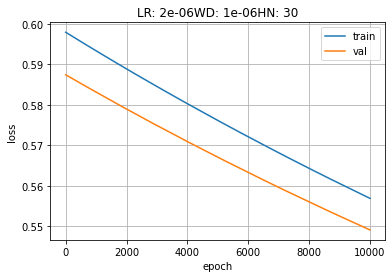

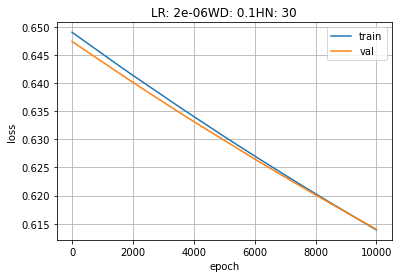

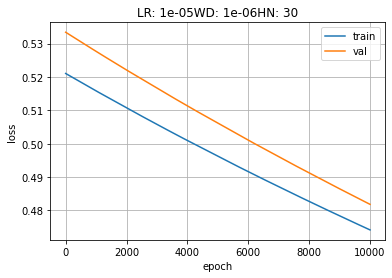

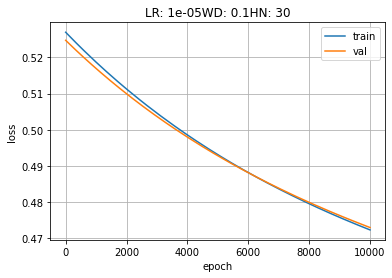

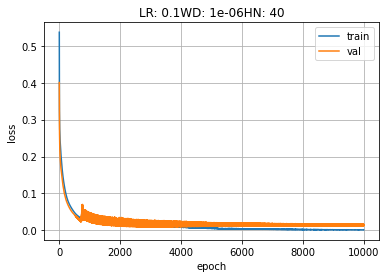

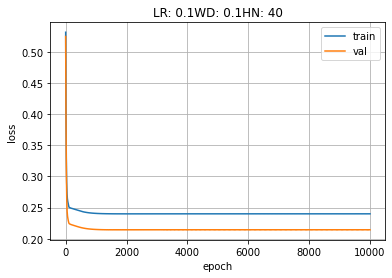

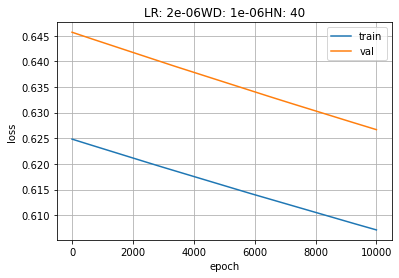

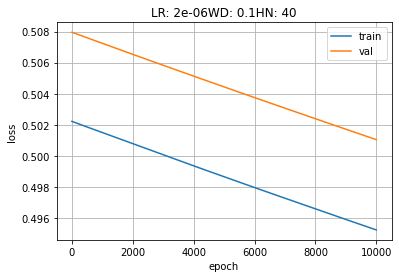

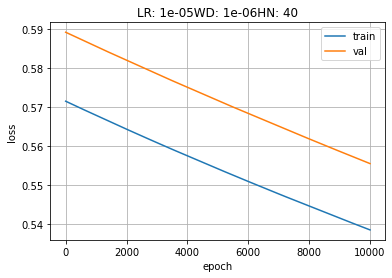

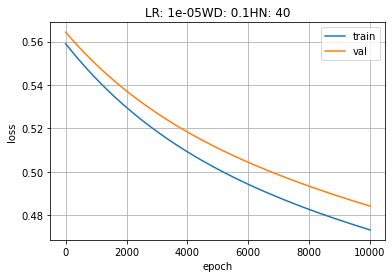

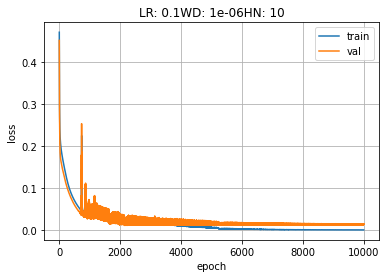

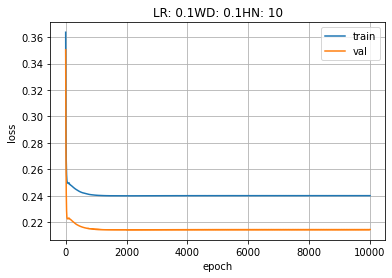

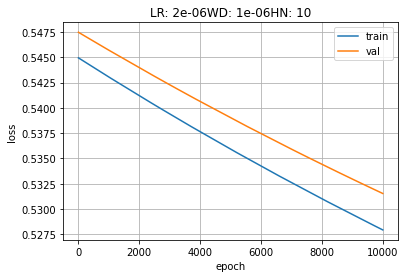

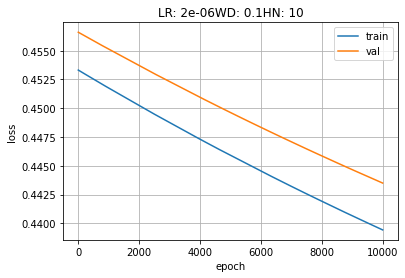

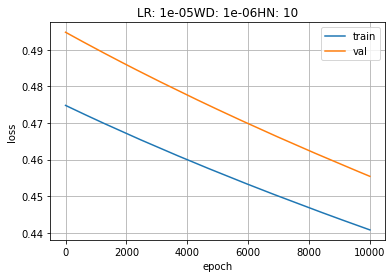

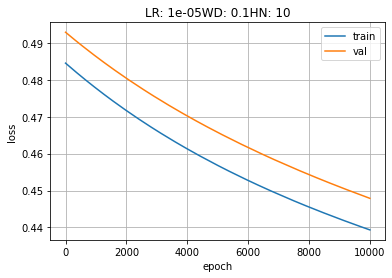

In [ ]:
modelff_hl2 = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000]
WEIGHT_DECAY = [0.000001,0.1] # Saco para que sea mas rapido 
HIDDEN_NEURONS= [20,30,40,10]
criterion = nn.MSELoss(reduction='sum')
for hn in range(len(HIDDEN_NEURONS)):
  for lr in range(len(LEARNING_RATE)):
    for wd in  range(len(WEIGHT_DECAY)):
      del (modelff_hl2)
      modelff_hl2 =FeedforwardNet2Layer(num_features=P,num_hidden=HIDDEN_NEURONS[1]) ##Modelo de feed forward con busqueda en grilla casera
    

      optimizer = SGD(modelff_hl2.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
      modelff_hl2.to(device)
      modelff_hl2.train()
      
      for e in range(len(EPOCHS)):
        
        
        title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd]) + "HN: " + str(HIDDEN_NEURONS[hn])
        x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
        y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
        n_train = len(x_train_tensor)

        x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
        y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
        n_val = len(x_val_tensor)

        train_loss = []
        val_loss = []
      
        for epoch in range(EPOCHS[e]):

          optimizer.zero_grad()                                
          y_pred = modelff_hl2(x_train_tensor)                       
          loss = criterion(y_pred, y_train_tensor) / n_train   
          loss.backward()                                      
          optimizer.step()                                     
          
          train_loss.append(loss.detach().item())
          
          with torch.no_grad():
            y_pred = modelff_hl2(x_val_tensor)
            loss = criterion(y_pred, y_val_tensor) / n_val
            val_loss.append(loss.item())
                      
          if epoch % (EPOCHS[e]//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
                
        plt.figure()
        plt.plot(np.arange(EPOCHS[e]), train_loss)
        plt.plot(np.arange(EPOCHS[e]), val_loss)
        plt.title(title)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'])
        plt.grid()
        train_loss =0
        val_loss = 0
        model.eval()  
        y_pred = modelff_hl2(x_val_tensor)
        y_pred = y_pred.cpu().detach().numpy().squeeze() 

In [ ]:
#Modelo de FF con tres capas ocultas con activacion ReLU
class FeedforwardNet3Layer(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()        
        # completa con tu código aquí
        self.num_features = num_features
        self.num_hidden = num_hidden
        self.input = torch.nn.Linear(self.num_features, self.num_hidden)
        self.hidden1= torch.nn.ReLU()
        self.hidden2= torch.nn.ReLU()
        self.hidden3= torch.nn.ReLU()
        self.output = nn.Linear(num_hidden, 1)
        
    def forward(self, x):

        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        return self.output(x)
        

epoch = 00, train_loss = 4.969e-01, val_loss = 4.702e-01
epoch = 1000, train_loss = 4.999e-02, val_loss = 5.312e-02
epoch = 2000, train_loss = 2.772e-02, val_loss = 3.469e-02
epoch = 3000, train_loss = 2.072e-02, val_loss = 3.417e-02
epoch = 4000, train_loss = 1.499e-02, val_loss = 3.202e-02
epoch = 5000, train_loss = 9.930e-03, val_loss = 2.778e-02
epoch = 6000, train_loss = 5.405e-03, val_loss = 2.245e-02
epoch = 7000, train_loss = 4.180e-03, val_loss = 2.091e-02
epoch = 8000, train_loss = 2.741e-03, val_loss = 1.901e-02
epoch = 9000, train_loss = 2.168e-03, val_loss = 1.856e-02
epoch = 00, train_loss = 5.355e-01, val_loss = 4.385e-01
epoch = 1000, train_loss = 2.416e-01, val_loss = 2.158e-01
epoch = 2000, train_loss = 2.402e-01, val_loss = 2.145e-01
epoch = 3000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 4000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 5000, train_loss = 2.401e-01, val_loss = 2.144e-01
epoch = 6000, train_loss = 2.401e-01, val_loss = 2.144e-01
e

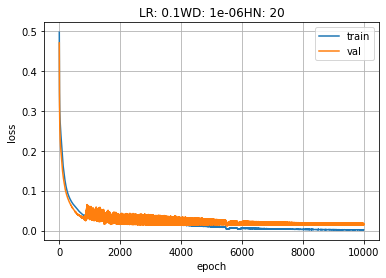

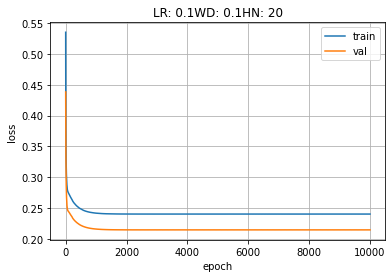

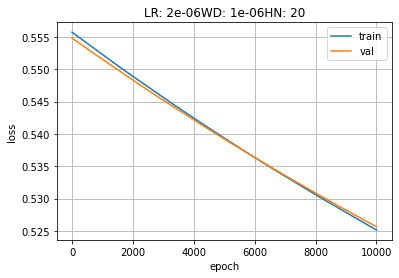

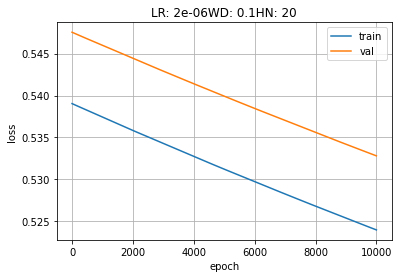

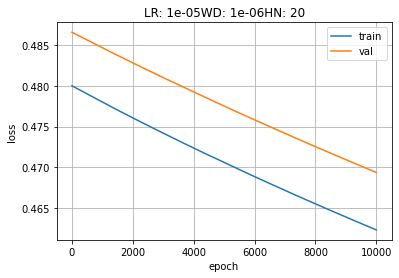

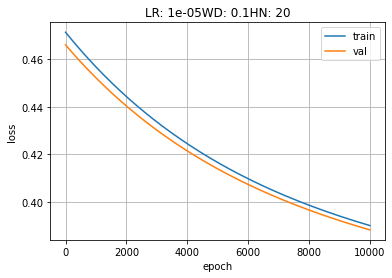

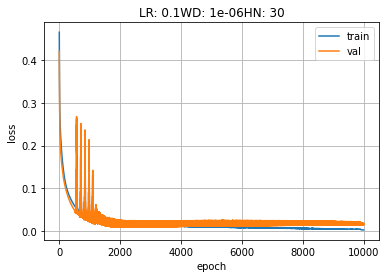

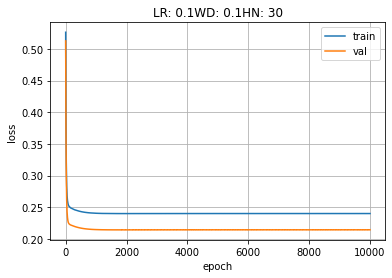

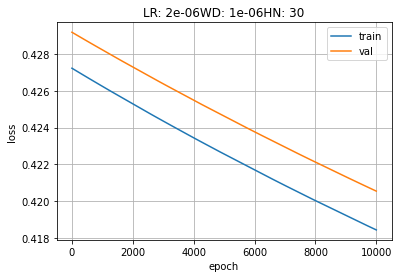

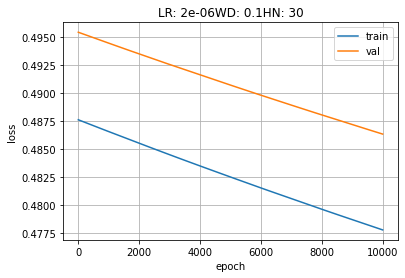

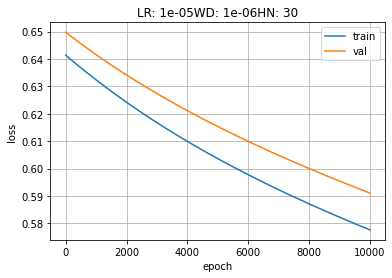

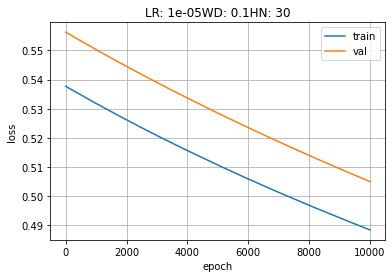

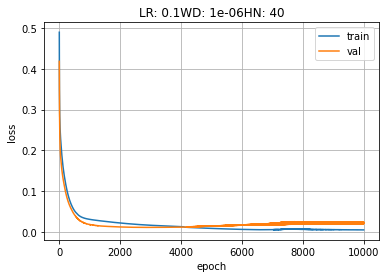

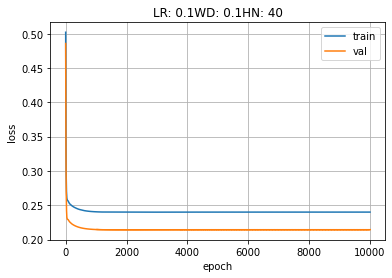

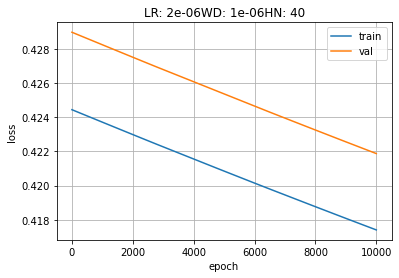

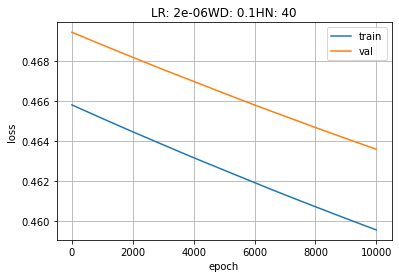

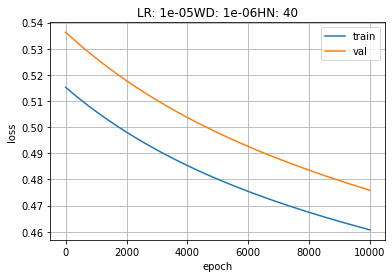

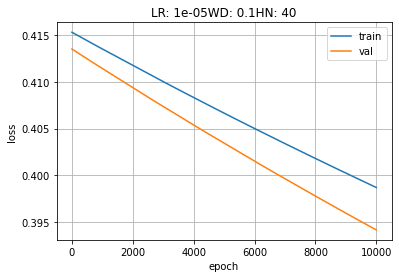

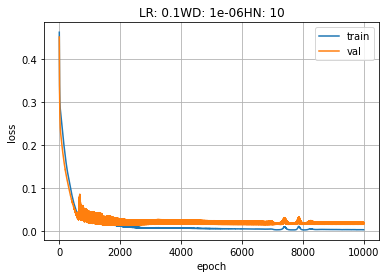

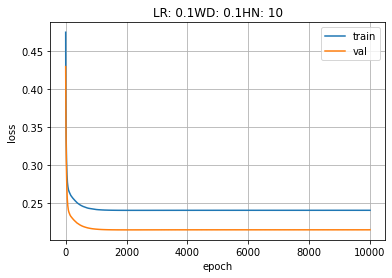

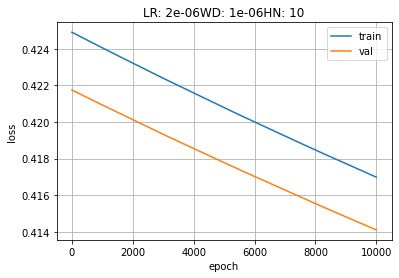

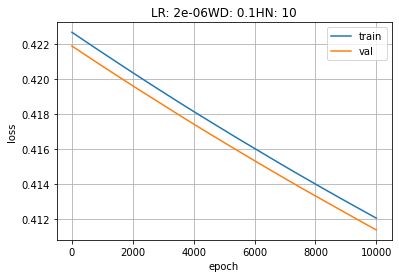

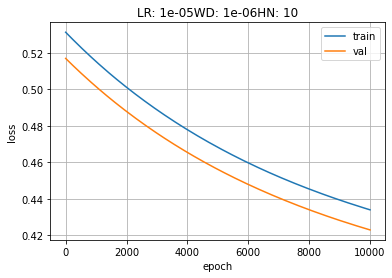

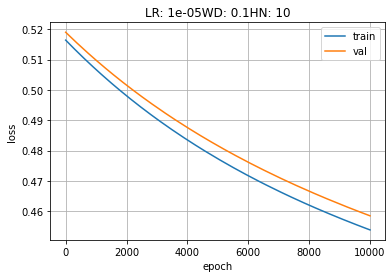

In [ ]:
modelff_hl3 = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000]
WEIGHT_DECAY = [0.000001,0.1] # Saco para que sea mas rapido 
HIDDEN_NEURONS= [20,30,40,10]
criterion = nn.MSELoss(reduction='sum')
for hn in range(len(HIDDEN_NEURONS)):
  for lr in range(len(LEARNING_RATE)):
    for wd in  range(len(WEIGHT_DECAY)):
      del (modelff_hl3)
      modelff_hl3 =FeedforwardNet2Layer(num_features=P,num_hidden=HIDDEN_NEURONS[1]) ##Modelo de feed forward con busqueda en grilla casera
    

      optimizer = SGD(modelff_hl3.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
      modelff_hl3.to(device)
      modelff_hl3.train()
      
      for e in range(len(EPOCHS)):
        
        
        title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd]) + "HN: " + str(HIDDEN_NEURONS[hn])
        x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
        y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
        n_train = len(x_train_tensor)

        x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
        y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
        n_val = len(x_val_tensor)

        train_loss = []
        val_loss = []
      
        for epoch in range(EPOCHS[e]):

          optimizer.zero_grad()                                
          y_pred = modelff_hl3(x_train_tensor)                       
          loss = criterion(y_pred, y_train_tensor) / n_train   
          loss.backward()                                      
          optimizer.step()                                     
          
          train_loss.append(loss.detach().item())
          
          with torch.no_grad():
            y_pred = modelff_hl3(x_val_tensor)
            loss = criterion(y_pred, y_val_tensor) / n_val
            val_loss.append(loss.item())
                      
          if epoch % (EPOCHS[e]//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
                
        plt.figure()
        plt.plot(np.arange(EPOCHS[e]), train_loss)
        plt.plot(np.arange(EPOCHS[e]), val_loss)
        plt.title(title)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'])
        plt.grid()
        train_loss =0
        val_loss = 0
        model.eval()  
        y_pred = modelff_hl3(x_val_tensor)
        y_pred = y_pred.cpu().detach().numpy().squeeze() 

Hasta aqui, con las pruebas con los tres tipos de red diferentes, puedo ver que al agregar mas cantidad de capas y pocas neuronas (generalmente con 10) se observa que se vuelve inestable y genera ruido en el grafico, como es el ejemplo de las 10 neuronas, lr 0.1 y wd 0.00006. Pero al agregar otra capa mas, se estabiliza un poco mejor, pero no es tan optima como la primera red creada, de una sola capa oculta, por mas que se agreguen neuronas.
Otra cosa que note, es que al agregar mas neuronas, el modelo se vuelve muy flexible y tiende a overfitear.

Ahora, probare el metodo utilizado anteriormente pero con L1 Loss para poder analizar su comportamiento y arrojar una conclusion.
Usare la red de una sola capa oculta, ya que para este modelo, se hace muy inestable a la hora de agregar mas cantidad de capas ocultas y neuronas



epoch = 00, train_loss = 2.390e-02, val_loss = 4.953e-03
epoch = 1000, train_loss = 1.097e-02, val_loss = 1.785e-03
epoch = 2000, train_loss = 9.414e-03, val_loss = 1.546e-03
epoch = 3000, train_loss = 8.259e-03, val_loss = 1.386e-03
epoch = 4000, train_loss = 7.366e-03, val_loss = 1.255e-03
epoch = 5000, train_loss = 6.555e-03, val_loss = 1.115e-03
epoch = 6000, train_loss = 5.765e-03, val_loss = 9.796e-04
epoch = 7000, train_loss = 4.988e-03, val_loss = 8.488e-04
epoch = 8000, train_loss = 4.276e-03, val_loss = 7.292e-04
epoch = 9000, train_loss = 3.632e-03, val_loss = 6.202e-04
epoch = 00, train_loss = 2.523e-02, val_loss = 5.191e-03
epoch = 1000, train_loss = 2.523e-02, val_loss = 5.190e-03
epoch = 2000, train_loss = 2.523e-02, val_loss = 5.190e-03
epoch = 3000, train_loss = 2.522e-02, val_loss = 5.189e-03
epoch = 4000, train_loss = 2.522e-02, val_loss = 5.188e-03
epoch = 5000, train_loss = 2.522e-02, val_loss = 5.187e-03
epoch = 6000, train_loss = 2.521e-02, val_loss = 5.187e-03
e

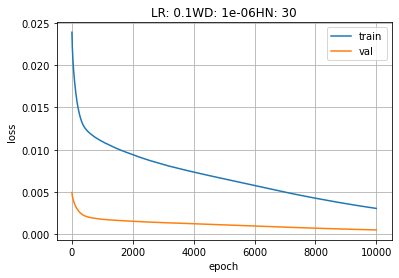

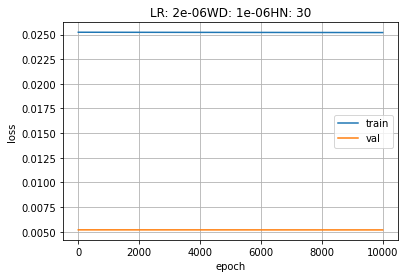

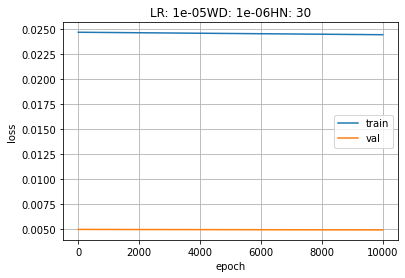

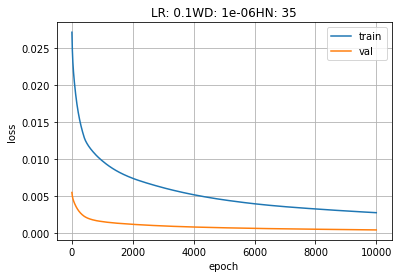

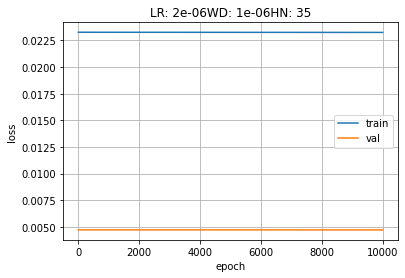

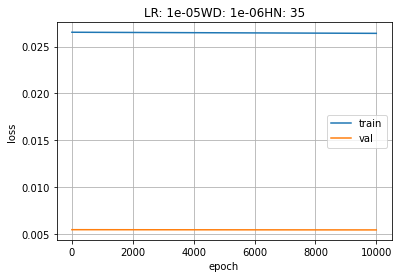

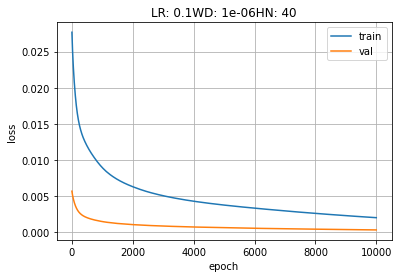

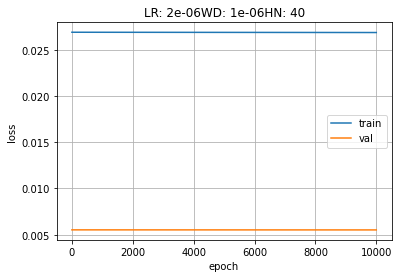

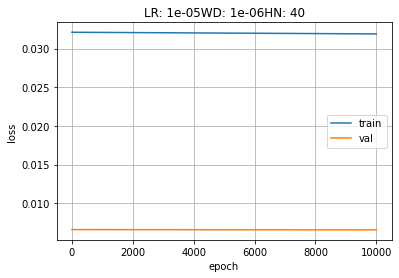

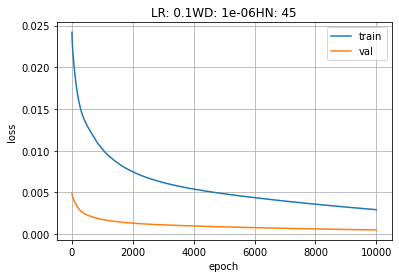

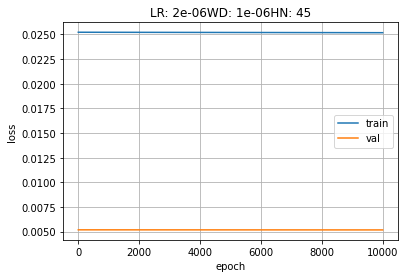

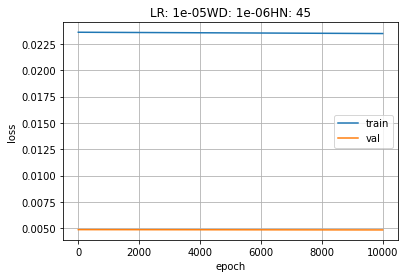

In [ ]:
modelff_l1 = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000] #Saco epocas para hacer mas rapido el notebook
WEIGHT_DECAY = [0.000001,] #Saco para poder hacer las mas rapido el notebook
HIDDEN_NEURONS = [30,35,40,45]
criterion = nn.MSELoss(reduction='sum')
for hn in range(len(HIDDEN_NEURONS)):
  for lr in range(len(LEARNING_RATE)):
    for wd in  range(len(WEIGHT_DECAY)):
      del (modelff_l1)
      modelff_l1 =FeedforwardNet(num_features=P,num_hidden=HIDDEN_NEURONS[hn]) ##Modelo de feed forward con busqueda en grilla casera
    

      optimizer = SGD(modelff_l1.parameters(), lr=LEARNING_RATE[lr])
      modelff_l1.to(device)
      modelff_l1.train()
      
      for e in range(len(EPOCHS)):
        
        
        title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd]) + "HN: " + str(HIDDEN_NEURONS[hn])
        x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
        y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
        n_train = len(x_train_tensor)

        x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
        y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
        n_val = len(x_val_tensor)

        train_loss = []
        val_loss = []
      
        for epoch in range(EPOCHS[e]):

          optimizer.zero_grad()                                
          y_pred = modelff_l1(x_train_tensor)                       
          loss = l1_loss(y_pred, y_train_tensor) / n_train   
          loss.backward()                                      
          optimizer.step()                                     
          
          train_loss.append(loss.detach().item())
          
          with torch.no_grad():
            y_pred = modelff_l1(x_val_tensor)
            loss = l1_loss(y_pred, y_val_tensor) / n_val
            val_loss.append(loss.item())
                      
          if epoch % (EPOCHS[e]//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
                
        plt.figure()
        plt.plot(np.arange(EPOCHS[e]), train_loss)
        plt.plot(np.arange(EPOCHS[e]), val_loss)
        plt.title(title)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'])
        plt.grid()
        train_loss =0
        val_loss = 0
        model.eval()  
        y_pred = modelff_l1(x_val_tensor)
        y_pred = y_pred.cpu().detach().numpy().squeeze() 

Al igual que la primera prueba que realice mas arriba con L1, noto que no es la mejor opción, ya sea que se utilice redes feed FF o lineales.

Cracion de una red Feedforward con activacion tanh y una capa oculta


In [ ]:
class FeedforwardNetTanh(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()        
        # completa con tu código aquí
        self.num_features = num_features
        self.num_hidden = num_hidden
        self.input = torch.nn.Linear(self.num_features, self.num_hidden)
        self.hidden = torch.nn.Tanh()
        self.output = nn.Linear(num_hidden, 1)
        
    def forward(self, x):

        hidden = self.input(x)
        tanh = self.hidden(hidden)
        output = self.output(tanh)
        
        return output

epoch = 00, train_loss = 4.990e-01, val_loss = 4.874e-01
epoch = 1000, train_loss = 1.513e-01, val_loss = 1.113e-01
epoch = 2000, train_loss = 1.354e-01, val_loss = 9.564e-02
epoch = 3000, train_loss = 1.288e-01, val_loss = 8.961e-02
epoch = 4000, train_loss = 1.254e-01, val_loss = 8.665e-02
epoch = 5000, train_loss = 1.233e-01, val_loss = 8.500e-02
epoch = 6000, train_loss = 1.219e-01, val_loss = 8.401e-02
epoch = 7000, train_loss = 1.210e-01, val_loss = 8.338e-02
epoch = 8000, train_loss = 1.203e-01, val_loss = 8.297e-02
epoch = 9000, train_loss = 1.197e-01, val_loss = 8.270e-02
epoch = 00, train_loss = 5.405e-01, val_loss = 5.039e-01
epoch = 1000, train_loss = 1.551e-01, val_loss = 1.156e-01
epoch = 2000, train_loss = 1.374e-01, val_loss = 9.770e-02
epoch = 3000, train_loss = 1.302e-01, val_loss = 9.089e-02
epoch = 4000, train_loss = 1.265e-01, val_loss = 8.759e-02
epoch = 5000, train_loss = 1.242e-01, val_loss = 8.575e-02
epoch = 6000, train_loss = 1.228e-01, val_loss = 8.464e-02
e

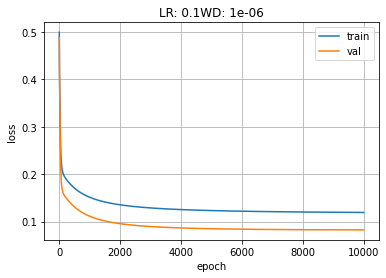

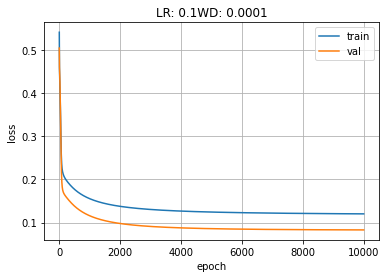

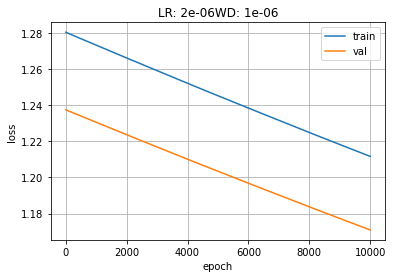

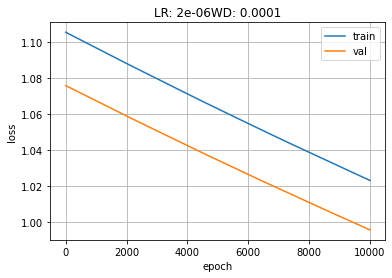

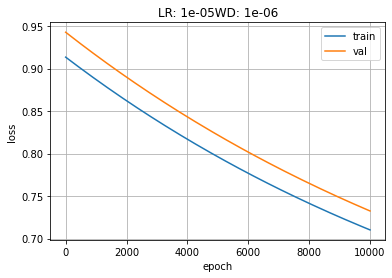

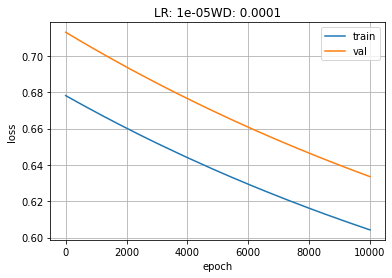

In [ ]:
modelff_tanh = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = [10000] #Saco algunas epocas porque se hace muy pesado computacionalmente.
WEIGHT_DECAY = [0.000001,0.0001] #Cuando tengo que ejecutar a cada rato se hace pesado, asi que saco algunos wd

criterion = nn.MSELoss(reduction='sum')

for lr in range(len(LEARNING_RATE)):
  for wd in  range(len(WEIGHT_DECAY)):
    del (modelff_tanh)
    modelff_tanh =FeedforwardNetTanh(num_features=P,num_hidden=1) ##Modelo de feed forward con busqueda en grilla casera
  

    optimizer = SGD(modelff_tanh.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[wd])
    modelff_tanh.to(device)
    modelff_tanh.train()
    
    for e in range(len(EPOCHS)):
      
      
      title = "LR: " + str(LEARNING_RATE[lr]) + "WD: " + str(WEIGHT_DECAY[wd])
      x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
      y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
      n_train = len(x_train_tensor)

      x_val_tensor = torch.from_numpy(np.float32(x_val_vec)).to(device)
      y_val_tensor = torch.from_numpy(np.float32(y_val_vec)).to(device)
      n_val = len(x_val_tensor)

      train_loss = []
      val_loss = []
    
      for epoch in range(EPOCHS[e]):

        optimizer.zero_grad()                                
        y_pred = modelff_tanh(x_train_tensor)                       
        loss = criterion(y_pred, y_train_tensor) / n_train   
        loss.backward()                                      
        optimizer.step()                                     
        
        train_loss.append(loss.detach().item())
        
        with torch.no_grad():
          y_pred = modelff_tanh(x_val_tensor)
          loss = criterion(y_pred, y_val_tensor) / n_val
          val_loss.append(loss.item())
                    
        if epoch % (EPOCHS[e]//10) == 0:
          print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss[-1], val_loss[-1]))
              
      plt.figure()
      plt.plot(np.arange(EPOCHS[e]), train_loss)
      plt.plot(np.arange(EPOCHS[e]), val_loss)
      plt.title(title)
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'])
      plt.grid()
      train_loss =0
      val_loss = 0
      model.eval()  
      y_pred = modelff_tanh(x_val_tensor)
      y_pred = y_pred.cpu().detach().numpy().squeeze() 

Contrastando con la funcion de activacion ReLU, no es mala idea utilizar tangente hiperbolica como funcion de activacion, ya que su comportamiento en la busqueda en grilla ha funcionado de una manera muy buena y me sorprendio la perfomance lograda con la misma.

Sigo con el practico y realizo la prueba de batch size y learning rate para poder ver como funcionan


In [ ]:
###Lo traigo del github para poder comprender como funciona.

BATCH_SIZE = 5

train_data = data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0,)

val_data = data.TensorDataset(x_val_tensor, y_val_tensor)
val_loader = data.DataLoader(dataset=val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=0,)

print(len(train_data), len(train_loader))



10 2


epoch = 00, train_loss = 5.924e-01, val_loss = 2.345e+01
epoch = 1000, train_loss = 4.506e-02, val_loss = 8.803e-01
epoch = 2000, train_loss = 2.988e-02, val_loss = 5.284e-01
epoch = 3000, train_loss = 1.970e-02, val_loss = 5.689e-01
epoch = 4000, train_loss = 1.974e-02, val_loss = 6.543e-01
epoch = 5000, train_loss = 2.181e-02, val_loss = 4.561e-01
epoch = 6000, train_loss = 1.781e-02, val_loss = 4.781e-01
epoch = 7000, train_loss = 1.550e-02, val_loss = 4.433e-01
epoch = 8000, train_loss = 1.530e-02, val_loss = 4.969e-01
epoch = 9000, train_loss = 1.810e-02, val_loss = 4.588e-01
epoch = 00, train_loss = 1.227e-01, val_loss = 1.917e+01
epoch = 1000, train_loss = 4.588e-02, val_loss = 6.152e+00
epoch = 2000, train_loss = 2.034e-02, val_loss = 2.463e+00
epoch = 3000, train_loss = 1.411e-02, val_loss = 1.496e+00
epoch = 4000, train_loss = 1.072e-02, val_loss = 1.049e+00
epoch = 5000, train_loss = 8.676e-03, val_loss = 8.462e-01
epoch = 6000, train_loss = 7.659e-03, val_loss = 7.200e-01
e

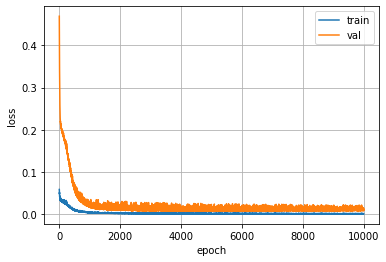

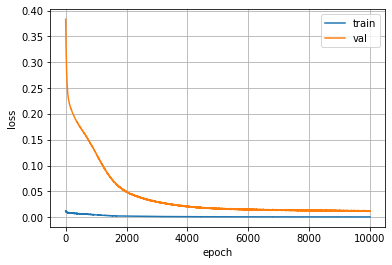

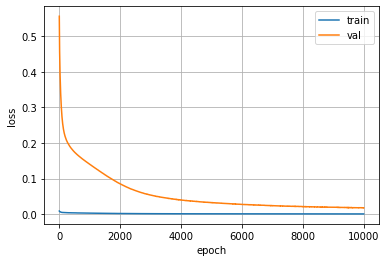

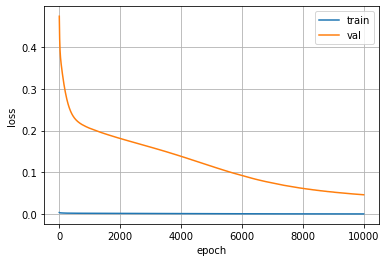

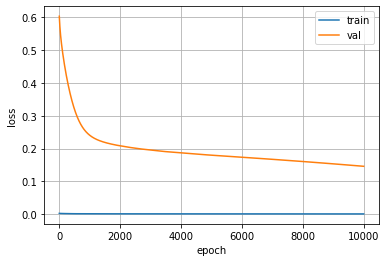

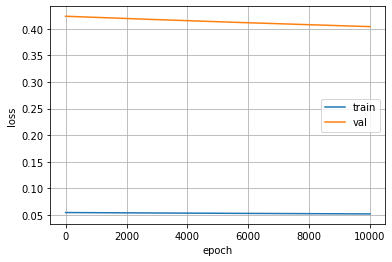

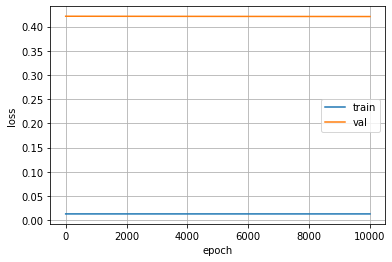

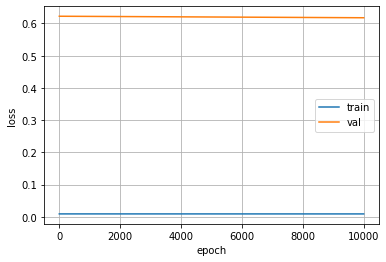

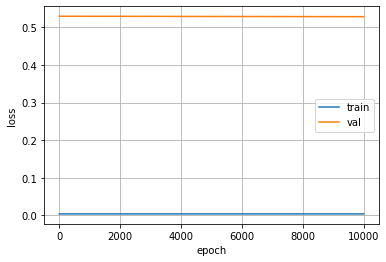

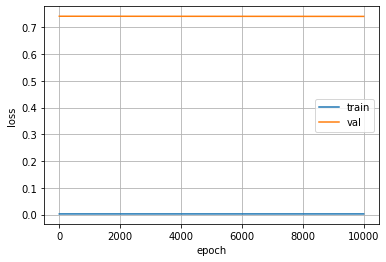

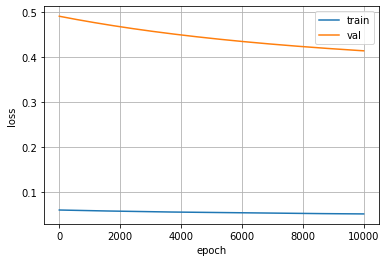

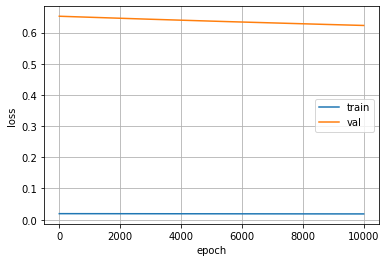

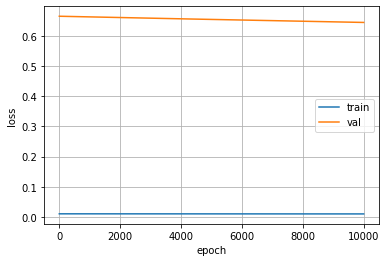

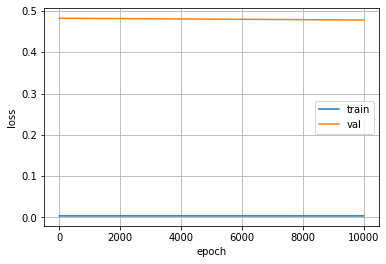

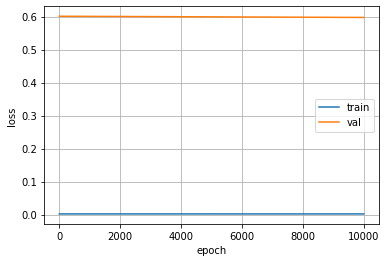

In [ ]:
modelff_bs = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = 10000
BATCH_SIZE = [8,32,64,128,256]
WEIGHT_DECAY = [0.000001,0.0001]

for lr in range(len(LEARNING_RATE)):
  for bs in range(len(BATCH_SIZE)):

    modelff_bs =FeedforwardNetTanh(num_features=P,num_hidden=10) ##Modelo de feed forward con busqueda en grilla casera
      

    optimizer = SGD(modelff_bs.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[1])
    modelff_bs.to(device)
    modelff_bs.train()

    train_loss, val_loss = [], []
    for epoch in range(EPOCHS):
          
        train_loss_acc = 0.    
        for x, y in train_loader:
            x.to(device, non_blocking=True)
            y.to(device, non_blocking=True)
                    
            optimizer.zero_grad()
            y_pred = modelff_bs(x)
            loss = criterion(y_pred, y) / BATCH_SIZE[bs]
            loss.backward()
            optimizer.step()
            
            train_loss_acc += loss.detach().item()
        train_loss.append(train_loss_acc / len(train_data))      
          
        
        with torch.no_grad():
            val_loss_acc = 0.
            for x, y in val_loader:        
                x.to(device, non_blocking=True)
                y.to(device, non_blocking=True)        
                
                y_pred = modelff_bs(x)      
                loss = criterion(y_pred, y)
                
                val_loss_acc += loss.item()    
            val_loss.append(val_loss_acc / len(val_data))
            
        if epoch % (EPOCHS//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss_acc, val_loss_acc))


    plt.figure()
    plt.plot(np.arange(EPOCHS), train_loss)
    plt.plot(np.arange(EPOCHS), val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()

    modelff_bs.eval()
    y_pred = modelff_bs(x_val_tensor)
    y_pred = y_pred.cpu().detach().numpy().squeeze()



Al implementar los diferentes batch sizes, no se tuvo un buen comportamiento en el modelo ya que veo que hay demasiada diferencia entre entrenamiento y prueba. Ademas, se destabiliza demasiado el modelo.

Realizo VGD para ver como funciona y realizar el ultimo punto obligatorio para poder trabajar en los opcionales

epoch = 00, train_loss = 4.763e+00, val_loss = 2.477e+01
epoch = 1000, train_loss = 5.110e+00, val_loss = 2.612e+01
epoch = 2000, train_loss = 6.467e+00, val_loss = 2.556e+01
epoch = 3000, train_loss = 4.969e+00, val_loss = 2.480e+01
epoch = 4000, train_loss = 6.441e+00, val_loss = 2.716e+01
epoch = 5000, train_loss = 5.224e+00, val_loss = 2.628e+01
epoch = 6000, train_loss = 5.361e+00, val_loss = 2.783e+01
epoch = 7000, train_loss = 4.965e+00, val_loss = 2.548e+01
epoch = 8000, train_loss = 6.917e+00, val_loss = 2.769e+01
epoch = 9000, train_loss = 4.938e+00, val_loss = 2.480e+01
epoch = 00, train_loss = 4.489e+01, val_loss = 2.230e+02
epoch = 1000, train_loss = 4.871e+00, val_loss = 2.491e+01
epoch = 2000, train_loss = 5.260e+00, val_loss = 2.721e+01
epoch = 3000, train_loss = 5.007e+00, val_loss = 2.473e+01
epoch = 4000, train_loss = 8.849e+00, val_loss = 3.805e+01
epoch = 5000, train_loss = 8.913e+00, val_loss = 2.684e+01
epoch = 6000, train_loss = 8.959e+00, val_loss = 3.506e+01
e

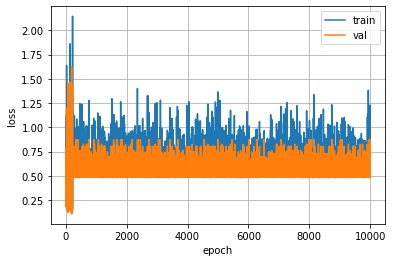

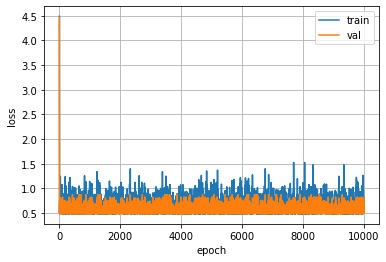

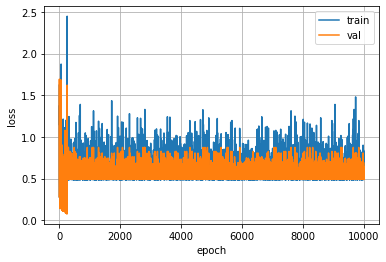

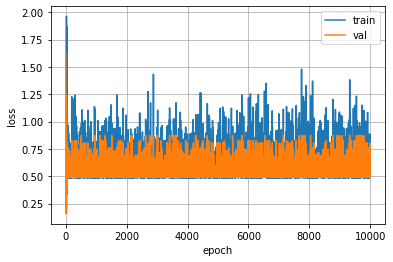

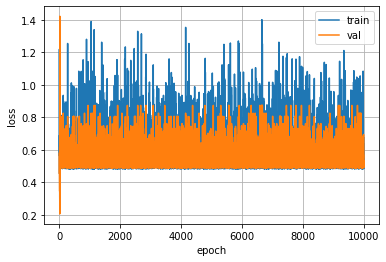

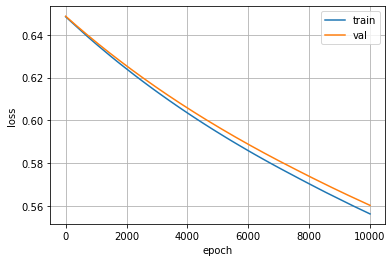

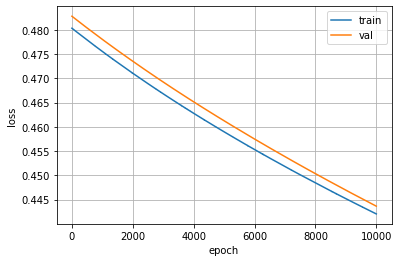

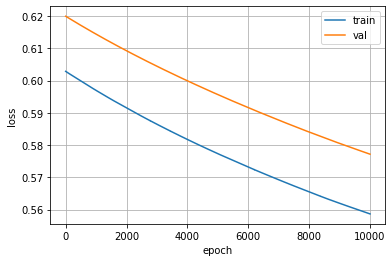

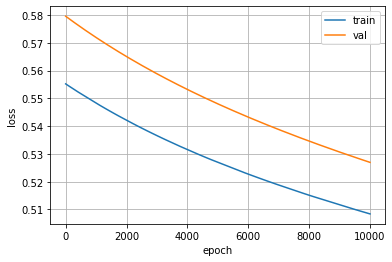

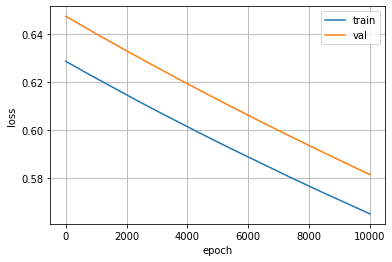

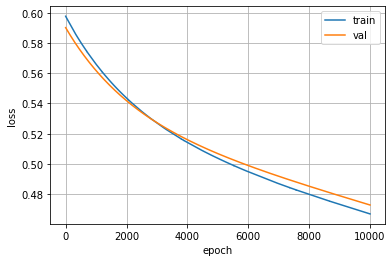

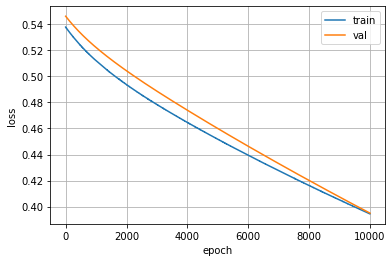

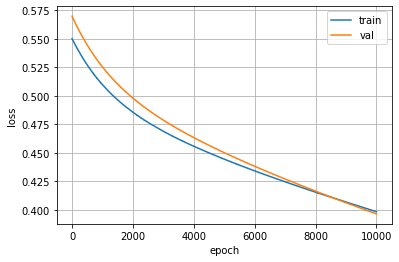

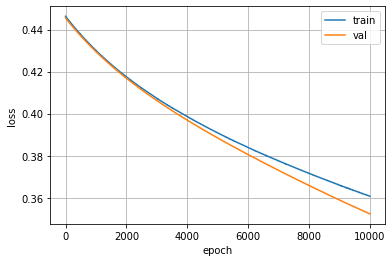

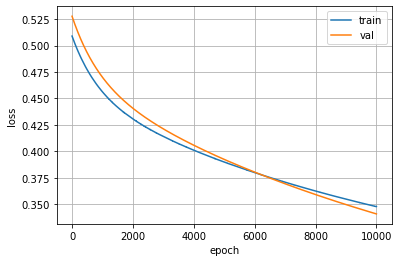

In [ ]:
modelff_vanilla = 0
LEARNING_RATE = [0.1,0.000002,0.00001]
EPOCHS = 10000
BATCH_SIZE = [8,32,64,128,256]
WEIGHT_DECAY = [0.000001,0.0001]

for lr in range(len(LEARNING_RATE)):
  for bs in range(len(BATCH_SIZE)):

    modelff_vanilla =FeedforwardNet(num_features=P,num_hidden=10) ##Modelo de feed forward con busqueda en grilla casera
      

    optimizer = SGD(modelff_vanilla.parameters(), lr=LEARNING_RATE[lr], weight_decay=WEIGHT_DECAY[1])
    modelff_vanilla.to(device)
    modelff_vanilla.train()
    train_loss, val_loss = [], []
    for epoch in range(EPOCHS):
          
        train_loss_acc = 0.    
        for x, y in train_loader:
            x.to(device, non_blocking=True)
            y.to(device, non_blocking=True)
                    
            optimizer.zero_grad()
            y_pred = modelff_vanilla(x)
            #Segun diferentes documentaciones que pude leer, para hacer vanilla, solo hay que sacar la division por batch para el loss
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            
            train_loss_acc += loss.detach().item()
        train_loss.append(train_loss_acc / len(train_data))        
        
        with torch.no_grad():
            val_loss_acc = 0.
            for x, y in val_loader:        
                x.to(device, non_blocking=True)
                y.to(device, non_blocking=True)        
                
                y_pred = modelff_vanilla(x)      
                loss = criterion(y_pred, y)
                
                val_loss_acc += loss.item()    
            val_loss.append(val_loss_acc / len(val_data))
            
        if epoch % (EPOCHS//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss_acc, val_loss_acc))


    plt.figure()
    plt.plot(np.arange(EPOCHS), train_loss)
    plt.plot(np.arange(EPOCHS), val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()

    modelff_vanilla.eval()
    y_pred = modelff_vanilla(x_val_tensor)
    y_pred = y_pred.cpu().detach().numpy().squeeze()


Bien, al haber probado vanilla gradiant descent dentro de la iteracion de batch size, no hay mejoras con respecto a esta ejercitacion, ya que se vuelve demasiado inestable el modelo en las primera iteraciones. Luego, a medida que aumenta el tamaño de batch size, mejora el modelo, pero se pierde la escencia de utilizar mini batch size, que es poder optimizar el entrenamiento cuando se hace uso de GPU, por ejemplo.

Hasta aqui realice los ejercicios planteados por la guia como ejercicios obligatorios. Ahora, realizare la implementacion de ejercicios opcionales




Algunas actividades opcionales para intentar con transfer-learning...

Transfer a modelos de scikit-learn

    Evaluar clasificadores que vimos anteriormente, como KNN o SVC. Buscar combinaciones de híper-parámetros que mejoren la performance del modelo.

Fine-tuning

    Con las capas freezadas, encontrar rangos de valores razonables para el learning_rate. Observar evolución de la función de costo ("train" y "val") para guiar la búsqueda y selección.

    En lugar de dejar capas congeladas, configurar la red para adaptar todos sus parámetros y reentrenar la misma para el nuevo dataset. Evaluar cómo resulta tal entrenamiento.

    De contar con disponibilidad de GPUs (o desde Google Colab), probar cambiando la arquitectura a una más compleja (ej. resnet50).

General

    Buscar algún otro dominio de imágenes para hacer transfer-learning. Tener en cuenta que según el formato de pytorch, se deben dividir las imágenes en carpetas train y val, y a su vez cada una de ellas en una subcarpeta por clase.

    Implementar esquemas de data augmentation más agresivos durante el entrenamiento (p.ej. rotaciones o crops aleatorios, etc.) y evaluar cómo mejora el modelo con ellos. Ver transformaciones disponibles acá.



# Parte 2 - CNN - [Damián Pramparo - CNN ](https://colab.research.google.com/drive/1Q9LJ5la-FvzCQCoMsZe_pvPTDlFosGOT?usp=sharing
)

